In [2]:
import pandas as pd
import numpy as np

In [3]:
data_frame=  pd.read_csv('./spam.csv', encoding='latin-1')

In [4]:
data_frame.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data_frame.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [7]:
data_frame.rename(columns={'v1':'type', 'v2':'email'},inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [9]:
data_frame['type']= encode.fit_transform(data_frame['type'])

In [10]:
data_frame.isnull().sum()

type     0
email    0
dtype: int64

In [11]:
data_frame.duplicated().sum()

403

In [12]:
data_frame = data_frame.drop_duplicates()

In [13]:
import nltk

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Ankit
[nltk_data]     Nag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
data_frame['no_of_char']=data_frame['email'].apply(len)

In [16]:
data_frame['no_of_words']=data_frame['email'].apply(lambda x:nltk.word_tokenize(x)).apply(len)

In [17]:
data_frame.head()

,type,email,no_of_char,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [18]:
data_frame['no_of_sent']=data_frame['email'].apply(lambda x:nltk.sent_tokenize(x)).apply(len)

In [19]:
data_frame.head()

,type,email,no_of_char,no_of_words,no_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
data_frame[['no_of_char','no_of_words','no_of_sent']].describe()

,no_of_char,no_of_words,no_of_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [21]:
data_frame[data_frame['type']==0][['no_of_char','no_of_words','no_of_sent']].describe()

,no_of_char,no_of_words,no_of_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [22]:
data_frame[data_frame['type']==1][['no_of_char','no_of_words','no_of_sent']].describe()

,no_of_char,no_of_words,no_of_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [23]:
import seaborn as sns

<AxesSubplot:xlabel='no_of_char', ylabel='Count'>

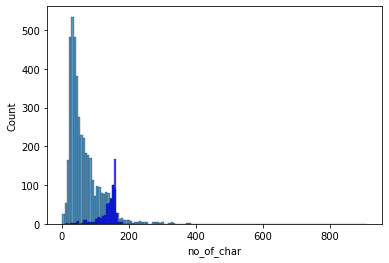

In [24]:
sns.histplot(data_frame[data_frame['type']==0]['no_of_char'])
sns.histplot(data_frame[data_frame['type']==1]['no_of_char'],color='blue')

<AxesSubplot:xlabel='no_of_words', ylabel='Count'>

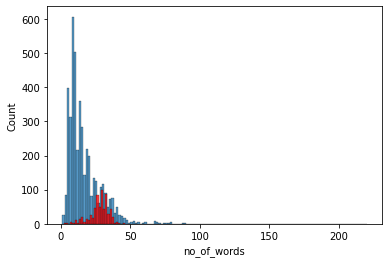

In [25]:
sns.histplot(data_frame[data_frame['type']==0]['no_of_words'])
sns.histplot(data_frame[data_frame['type']==1]['no_of_words'],color='red')

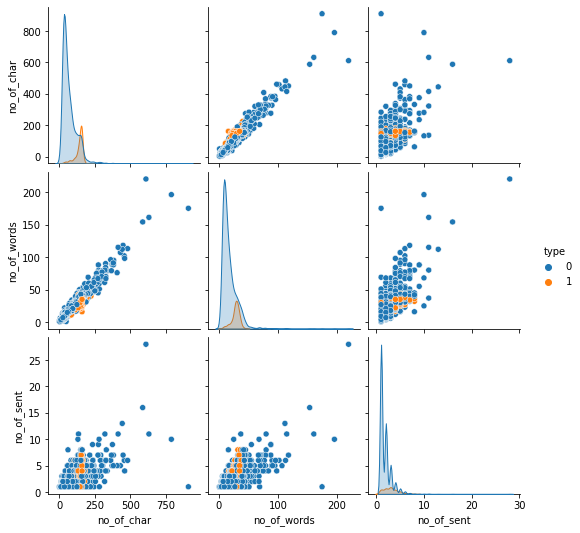

In [26]:
sns.pairplot(data_frame,hue='type')

In [27]:
data_frame.corr()

,type,no_of_char,no_of_words,no_of_sent
type,1.000000,0.384717,0.262984,0.284901
no_of_char,0.384717,1.000000,0.965770,0.638143
no_of_words,0.262984,0.965770,1.000000,0.684541
no_of_sent,0.284901,0.638143,0.684541,1.000000


In [28]:
from nltk.corpus import stopwords


In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ankit
[nltk_data]     Nag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
def text_processing(s):
    s=s.lower()
    s=nltk.word_tokenize(s)
    li=[]
    for i in s:
        if i.isalnum():
            li.append(i)
    s=li[:]
    li=[]
    for i in s:
        if i not in stopwords.words('english') and i not in string.punctuation:
            li.append(i)
    s=li[:]
    li=[]
    for i in s:
        li.append(port_stem.stem(i))


    return " ".join(li)

In [33]:
from nltk.stem.porter import PorterStemmer
port_stem=PorterStemmer()

In [35]:
data_frame['processed_text']=data_frame['email'].apply(text_processing)

In [ ]:
!pip install WordCloud

     ------------------------------------ 153.1/153.1 kB 480.8 kB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,background_color='white')

In [44]:
spam=wc.generate(data_frame[data_frame['type']==1]['processed_text'].str.cat(sep=" "))

In [45]:
import matplotlib.pyplot as plt

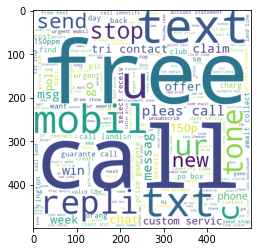

In [46]:
# plt.figure(figsize=(15,6))
plt.imshow(spam)


In [47]:
ham=wc.generate(data_frame[data_frame['type']==0]['processed_text'].str.cat(sep=" "))

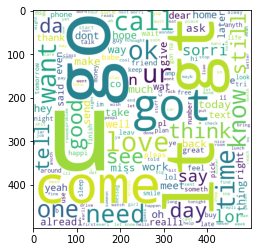

In [49]:
plt.imshow(ham)

In [52]:
spam_dict=[]
for msg in data_frame[data_frame['type']==1]['processed_text'].tolist():
    for i in msg.split():
        spam_dict.append(i)

c:\Users\Ankit Nag\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


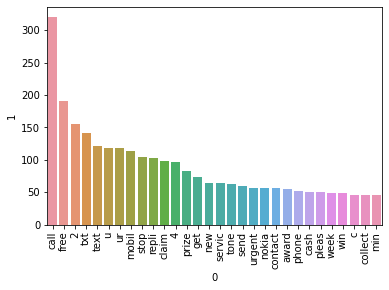

In [54]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_dict).most_common(30))[0],pd.DataFrame(Counter(spam_dict).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [55]:
ham_dict=[]
for msg in data_frame[data_frame['type']==0]['processed_text'].tolist():
    for i in msg.split():
        ham_dict.append(i)

c:\Users\Ankit Nag\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


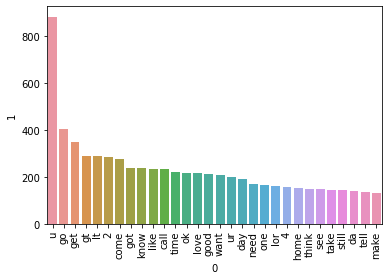

In [56]:
sns.barplot(pd.DataFrame(Counter(ham_dict).most_common(30))[0],pd.DataFrame(Counter(ham_dict).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [81]:
x=tfidf.fit_transform(data_frame['processed_text']).toarray()

In [82]:
y=data_frame['type'].values

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [85]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [86]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [87]:
gnb.fit(x_train,y_train)
y_pred_gnb= gnb.predict(x_test)
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [88]:
mnb.fit(x_train,y_train)
y_pred_mnb= mnb.predict(x_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [89]:
bnb.fit(x_train,y_train)
y_pred_bnb= bnb.predict(x_test)
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [90]:
import pickle
pickle.dump(tfidf,open('vec.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))